In [1]:
# How to deal with Shape Files
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
geo_df = gpd.read_file('MP19_SZ_No_Sea/URA_MP19_SUBZONE_NO_SEA_PL.shp')

In [3]:
geo_df.head()

,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,geometry
0,1,MARINA EAST,MESZ01,Y,MARINA EAST,ME,CENTRAL REGION,CR,4FB7E5B1B9455DE0,2019-12-23,"POLYGON ((33222.981 29588.127, 33222.515 29587..."
1,5,INSTITUTION HILL,RVSZ05,Y,RIVER VALLEY,RV,CENTRAL REGION,CR,C3C22D1EE31757BD,2019-12-23,"POLYGON ((28481.446 30886.220, 28483.405 30886..."
2,1,ROBERTSON QUAY,SRSZ01,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,87306ABAF4B67E2E,2019-12-23,"POLYGON ((28087.344 30540.999, 28087.540 30540..."
3,1,JURONG ISLAND AND BUKOM,WISZ01,N,WESTERN ISLANDS,WI,WEST REGION,WR,C87E378D3456FC35,2019-12-23,"MULTIPOLYGON (((14557.697 30447.212, 14562.889..."
4,2,FORT CANNING,MUSZ02,Y,MUSEUM,MU,CENTRAL REGION,CR,8E8F2616FFA9E019,2019-12-23,"POLYGON ((29542.526 31041.199, 29553.718 31034..."


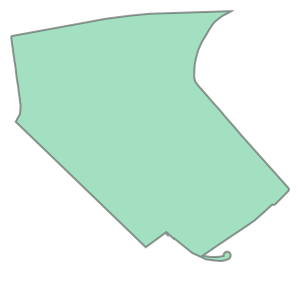

In [4]:
# To see the geomtry of the first row.
geo_df.loc[0, 'geometry']

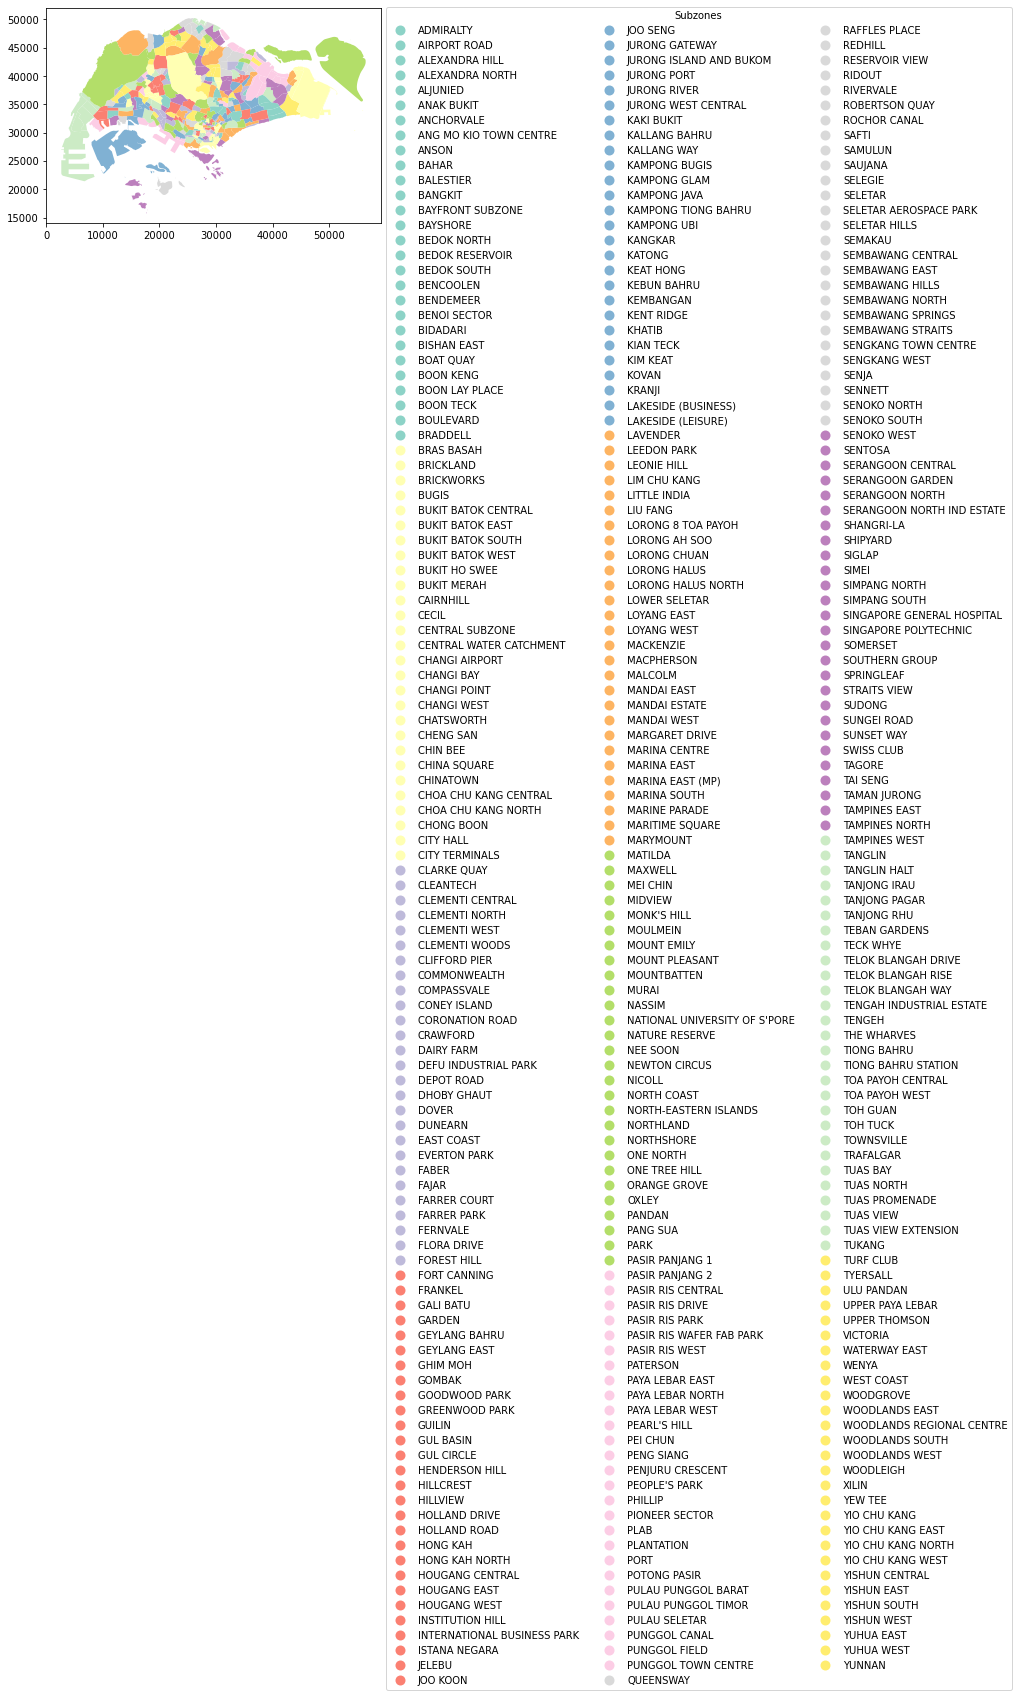

In [5]:
legend_keys = {'title': 'Subzones', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 3}
subzones = geo_df.plot(column = 'SUBZONE_N', cmap = 'Set3', legend = True, legend_kwds = legend_keys)

In [6]:
bus_stops = pd.read_csv("bus_stops.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'bus_stops.csv'

In [ ]:
from shapely.geometry import Point
# Creating a point geometry column
bus_stops['geometry'] = bus_stops.apply(lambda x: Point((x.Longitude, x.Latitude)),
                                       axis = 1)

In [ ]:
bus_stops.head()

In [9]:
geo_df.crs

# Create a GeoDataFrame from the original bus_stops DataFrame
bus_stops_crs = {'init': 'epsg:3857'}
bus_stops_geo = gpd.GeoDataFrame(bus_stops, 
                                 crs = bus_stops_crs,
                                 geometry = bus_stops.geometry)
# iT WORKED JUST NOW why did it suddenly not work????

/opt/anaconda3/envs/myproject/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


CRSError: Invalid projection: +init=epsg:3857 +type=crs: (Internal Proj Error: proj_create: SQLite error on SELECT name, coordinate_system_auth_name, coordinate_system_code, geodetic_crs_auth_name, geodetic_crs_code, conversion_auth_name, conversion_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM projected_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

In [10]:
joined_gdf = gpd.sjoin(bus_stops_geo, geo_df, op = 'intersects')

NameError: name 'bus_stops_geo' is not defined